# Diabetes Classification Using Machine Learning Techniques

In [1]:
## Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')
import joblib

In [2]:
## Load Dataset
df=pd.read_csv('dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
print(list(df.columns))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
## Split Features and Target Variable
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [9]:
## Outcome = 1 → Patient has diabetes
## Outcome = 0 → Patient does NOT have diabetes
y.value_counts()  # Check the distribution of target variable

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
zero_counts = (X == 0).sum()  # Check for zero values in features
zero_counts

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [11]:
zero_counts[zero_counts > 0].sort_values(ascending=False)

Insulin          374
SkinThickness    227
Pregnancies      111
BloodPressure     35
BMI               11
Glucose            5
dtype: int64

### In medical data, 0 is not a valid value for:
- Insulin
- SkinThickness
- Blood Pressure
- BMI
- Glucose

*`So, these zeros actually represent missing data.`*


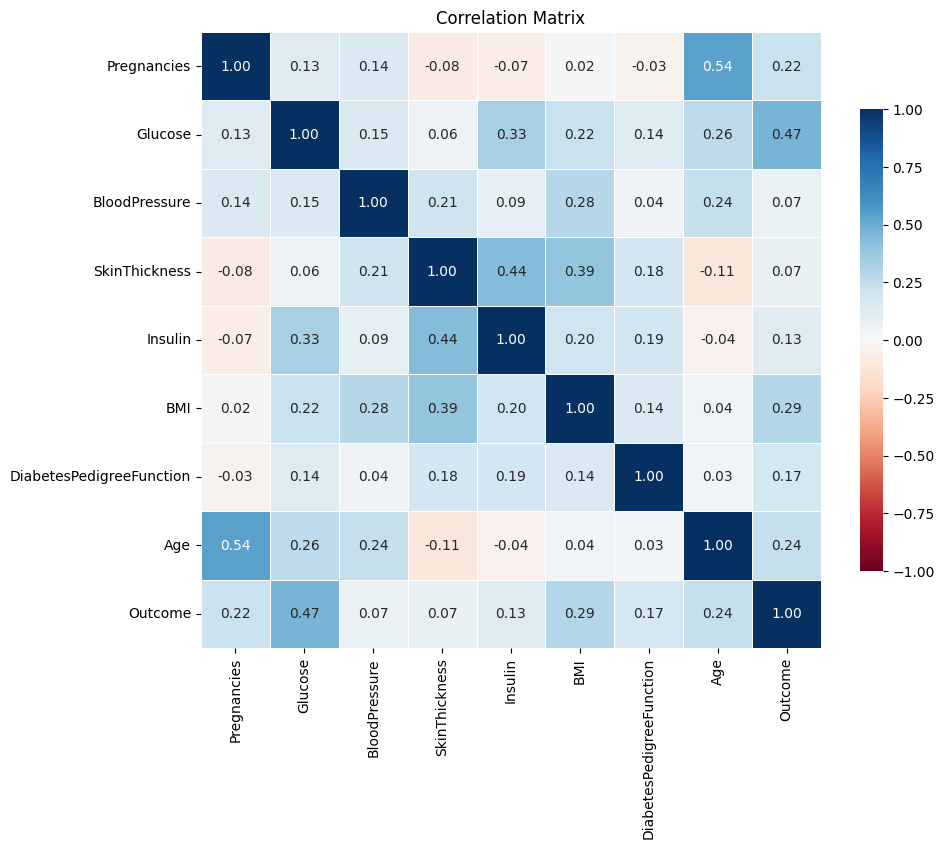

In [12]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='RdBu',fmt='.2f',vmin=-1,vmax=1, 
            center=0, linewidths=0.5, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix')
plt.show()

In [13]:
## Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)   
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (691, 8)
Testing set shape: (77, 8)


In [14]:
## Missing values columns
missing_value_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [16]:
## Numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
remaining_cols = [c for c in numerical_cols if c not in missing_value_cols]

print("Numerical columns:", numerical_cols)
print("Columns with missing values:", missing_value_cols)
print("Remaining columns:", remaining_cols)



Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Columns with missing values: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
Remaining columns: ['Pregnancies', 'DiabetesPedigreeFunction', 'Age']


In [17]:
## Preprocessing Pipelines
transformers=[]

if missing_value_cols:
    ## Pipeline for imputing missing values and scaling
    impute_then_scale = SklearnPipeline(steps=[
        ('imputer', SimpleImputer(missing_values=0, strategy='median')),
        ('scaler', StandardScaler())
    ])
    transformers.append(('impute_then_scale', impute_then_scale, missing_value_cols))
    
    ## Pipeline for scaling remaining numerical columns
    if remaining_cols:
        scale_remaining = SklearnPipeline(steps=[
            ('scaler', StandardScaler())
        ])
        transformers.append(('scale_remaining', scale_remaining, remaining_cols))
        
else:
    ## If no missing value columns, just scale all numerical columns
    scale_all = SklearnPipeline(steps=[
        ('scaler', StandardScaler())
    ])
    transformers.append(('scale_all', scale_all, numerical_cols))

In [18]:
preprocessor = ColumnTransformer(transformers=transformers, remainder='drop')
## remove='drop' to drop any columns not specified in transformers

In [19]:
from sklearn.model_selection import cross_val_score, cross_validate

In [20]:
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score


In [21]:
## Define the Model
model_1 =  GradientBoostingClassifier(learning_rate= 0.01,max_depth= 3,n_estimators= 150)
model_1

,loss,'log_loss'
,learning_rate,0.01
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [22]:
pipeline = SklearnPipeline(steps=[
    ('preprocessor', preprocessor),
    ('model_1', model_1)
])

In [23]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model_1', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute_then_scale', ...), ('scale_remaining', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
## predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

In [25]:
y_train_pred, y_test_pred

(array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [26]:
## evaluate the model

def compute_classification_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision_score': precision_score(y_true,y_pred),
        'recall_score': recall_score(y_true,y_pred),
        'roc_auc_score': roc_auc_score(y_true,y_pred),
        'confusion_matrix': confusion_matrix(y_true, y_pred),
        'classification_report': classification_report(y_true, y_pred)
    }

In [27]:
## Evaluate on Training Set
metrics_train = compute_classification_metrics(y_train, y_train_pred)
for key, value in metrics_train.items():
    print(f"Training {key}:\n{value}\n")
    

Training accuracy:
0.8060781476121563

Training precision_score:
0.8364779874213837

Training recall_score:
0.5518672199170125

Training roc_auc_score:
0.7470447210696174

Training confusion_matrix:
[[424  26]
 [108 133]]

Training classification_report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       450
           1       0.84      0.55      0.67       241

    accuracy                           0.81       691
   macro avg       0.82      0.75      0.76       691
weighted avg       0.81      0.81      0.79       691




In [28]:
metrics_test = compute_classification_metrics(y_test, y_test_pred)
for key, value in metrics_test.items():
    print(f"Testing {key}:\n{value}\n")
    

Testing accuracy:
0.7662337662337663

Testing precision_score:
0.7142857142857143

Testing recall_score:
0.5555555555555556

Testing roc_auc_score:
0.7177777777777777

Testing confusion_matrix:
[[44  6]
 [12 15]]

Testing classification_report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        50
           1       0.71      0.56      0.62        27

    accuracy                           0.77        77
   macro avg       0.75      0.72      0.73        77
weighted avg       0.76      0.77      0.76        77




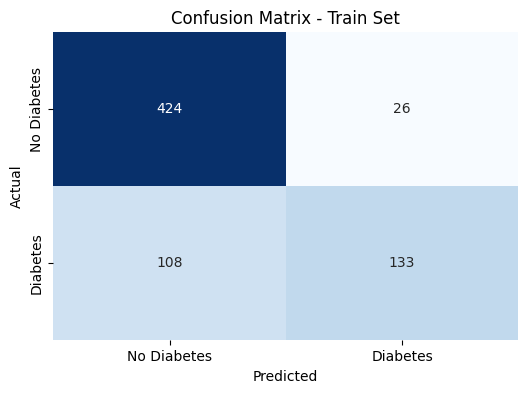

In [29]:
## confusion matrix heatmap for train set
cm_train = metrics_train['confusion_matrix']
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Train Set')
plt.show()

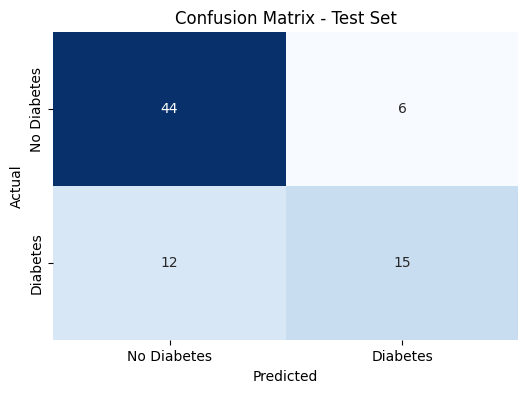

In [30]:
## confusion matrix heatmap for test set
cm_test = metrics_test['confusion_matrix']   
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [31]:
pipeline

,steps,"[('preprocessor', ...), ('model_1', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('impute_then_scale', ...), ('scale_remaining', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


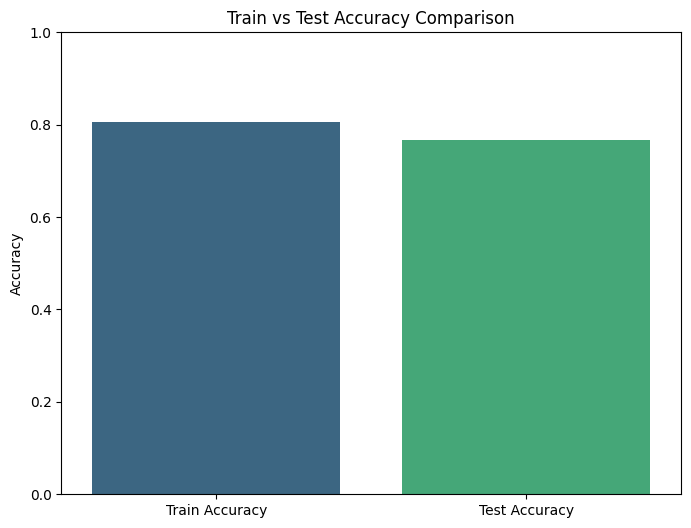

In [32]:
### TRain vs Test Accuracy Comparison
from matplotlib.pyplot import figure


train_accuracy = metrics_train['accuracy']
test_accuracy = metrics_test['accuracy']
figure(figsize=(8,6))
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.title('Train vs Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

In [33]:
from sklearn.model_selection import cross_val_score, cross_validate, RandomizedSearchCV

In [34]:
param_distributions = {
    'model_1__n_estimators': [50, 100, 150, 200],
    'model_1__learning_rate': [0.001, 0.01, 0.1, 0.2],
    'model_1__max_depth': [3, 5, 7, 9]
}   

In [35]:
RsCV = RandomizedSearchCV(pipeline, param_distributions, cv=5, scoring='accuracy', n_iter=10, random_state=42)

In [36]:
RsCV.fit(X_train, y_train)


,estimator,Pipeline(step...mators=150))])
,param_distributions,"{'model_1__learning_rate': [0.001, 0.01, ...], 'model_1__max_depth': [3, 5, ...], 'model_1__n_estimators': [50, 100, ...]}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [37]:
print(RsCV.best_params_)
print(RsCV.best_score_)

{'model_1__n_estimators': 50, 'model_1__max_depth': 5, 'model_1__learning_rate': 0.2}
0.7540402460640184


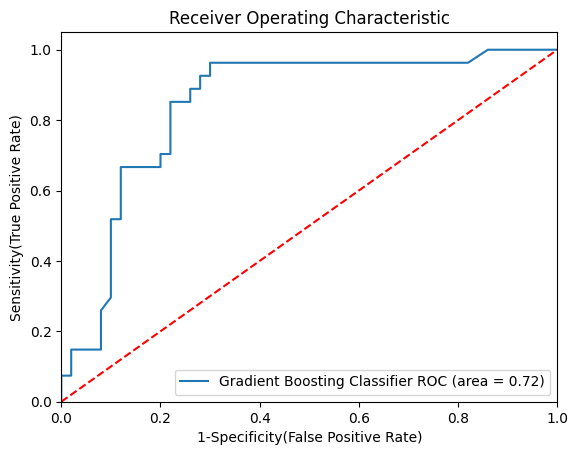

In [38]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Gradient Boosting Classifier',
    'model': GradientBoostingClassifier(learning_rate= 0.01,max_depth= 3,n_estimators= 150),
    'auc': 0.7177
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 

In [39]:
threshold = 0.32

In [40]:
y_train_prob = pipeline.predict_proba(X_train)[:, 1]
y_test_prob = pipeline.predict_proba(X_test)[:, 1]

In [41]:
metrics_train_thresholded = compute_classification_metrics(y_train, (y_train_prob >= threshold).astype(int))    

for key, value in metrics_train_thresholded.items():
    print(f"Training with threshold {threshold} {key}:\n{value}\n")

Training with threshold 0.32 accuracy:
0.8075253256150506

Training with threshold 0.32 precision_score:
0.6730769230769231

Training with threshold 0.32 recall_score:
0.8713692946058091

Training with threshold 0.32 roc_auc_score:
0.8223513139695712

Training with threshold 0.32 confusion_matrix:
[[348 102]
 [ 31 210]]

Training with threshold 0.32 classification_report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       450
           1       0.67      0.87      0.76       241

    accuracy                           0.81       691
   macro avg       0.80      0.82      0.80       691
weighted avg       0.83      0.81      0.81       691




In [42]:
## Evaluate with thresholded predictions
metrics_test_thresholded = compute_classification_metrics(y_test, y_test_prob >= threshold) 
for key, value in metrics_test_thresholded.items():
    print(f"Testing with threshold {threshold} {key}:\n{value}\n")
    

Testing with threshold 0.32 accuracy:
0.7922077922077922

Testing with threshold 0.32 precision_score:
0.6571428571428571

Testing with threshold 0.32 recall_score:
0.8518518518518519

Testing with threshold 0.32 roc_auc_score:
0.8059259259259259

Testing with threshold 0.32 confusion_matrix:
[[38 12]
 [ 4 23]]

Testing with threshold 0.32 classification_report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        50
           1       0.66      0.85      0.74        27

    accuracy                           0.79        77
   macro avg       0.78      0.81      0.78        77
weighted avg       0.82      0.79      0.80        77




In [46]:
import joblib

bundle = {
    "model": model,
    "threshold": threshold
}

joblib.dump(bundle, "diabetes_model_with_threshold.pkl")


['diabetes_model_with_threshold.pkl']